# Day 3: Parsing Dates
<br>
<br>

Welcome to day 3 of the 5-Day Data Challenge! Today, we're going to work with dates.
<br>

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in the data
earthquakes = pd.read_csv("earthquake_database.csv")
landslides = pd.read_csv("catalog.csv")
volcanos = pd.read_csv("volcano_database.csv")

#set seed for reproducibility
np.random.seed(0)


## Check the data type of our date column

For this part of the challenge, I'll be working with the date column from the landslides dataframe. The very first thing I'm going to do is take a look at the first couple rows to make sure it contains dates.


In [105]:
# print the first few rows of the date column
earthquakes['Date'].head()

0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
Name: Date, dtype: object



Those are indeed dates. Just because I recognize these are dates doesn't mean that Python knows that they're dates. Notice that the at the bottom of the output of head(), you can see that it says that the data type of this column is "object".

    Pandas uses the "object" dtype for storing various types of data types, but most often when you see a column with the dtype "object" it will have strings in it.

If you check the pandas dtype documentation here, you'll notice that there's also a specific datetime64 dtypes. Because the dtype of our column is object rather than datetime64, we can tell that Python doesn't know that this column contains dates.

We can also look at just the dtype of your column without printing the first few rows if we like:


In [106]:
# check the data type of our date column
earthquakes['Date'].dtypes

dtype('O')

## Convert our date columns to datetime
<br>
Now that we know python isn't recognizing our date column as a date, it's time to convert it so that it is recognized. This process is called "parsing dates."
<br>
We can specify the format of our dates with a guide called known as "strftime directive". The basic idea is that you need point out which parts of the date are where and what punctuation is used in the date. There are many possible parts of a date, but the most common are %d for day, %m for month, %y for a two-digit year or %Y for a four-digit year.

Some examples:
- 1/17/07 has the format "%m/%d/%y
- 17-1-2007 has the format "%d-%m-%Y"

<br> 
Looking back at the dates from our earthquakes dataframe, we can see the format is "month/day/four-digit year". If the date column is only in one format, parsing the dates is pretty straight forward. However, for our dataset, we run into an issue.

In [107]:
# This date is not in the same format as others
earthquakes.Date[3378]

'1975-02-23T02:58:41.000Z'

In the case we have multiple date formats, you have pandas try to infer what the right date format should be. You can accomplish this like so:


In [108]:
earthquakes['Date_parsed'] = pd.to_datetime(earthquakes['Date'], infer_datetime_format= True)


In [109]:
earthquakes['Date_parsed'].head()

0   1965-01-02
1   1965-01-04
2   1965-01-05
3   1965-01-08
4   1965-01-09
Name: Date_parsed, dtype: datetime64[ns]

We can now see the type of object is no longer an "Object" type, it is now correctly labeled a datetime object.
<br>
<br>
## Select just the year from our column
Now that we have our dates identified by Python, let's see how easy it is to get information from this column. Say we wanted the year only:

In [110]:
year_earthquakes = earthquakes['Date_parsed'].dt.year

In [111]:
year_earthquakes.head()

0    1965
1    1965
2    1965
3    1965
4    1965
Name: Date_parsed, dtype: int64

 ## Plot the day of the month to check the date parsing
 One danger of parsing dates is mixing up months and days. This is danger increases when you have mulitple formats of dates like we had, so it doesn't hurt to double check to see if the dates were formatted corrctly.

In [112]:
# Select the day of the month
day_of_month_earthquakes = earthquakes['Date_parsed'].dt.day

# check for na's(if there we must remove them)
day_of_month_earthquakes.isnull().sum()



0

Since there are no na's, we skip the removing na's step.
Let's plot:

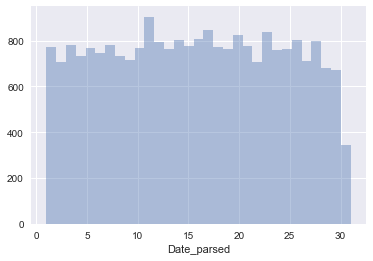

In [113]:
# plot day of the month
sns.distplot(day_of_month_earthquakes, kde=False, bins = 31)

This graph looks good and the limits of the x-axis do make sense. Looks like we parsed the dates correctly.
<br>
That's it for Day 3. Thanks for following.